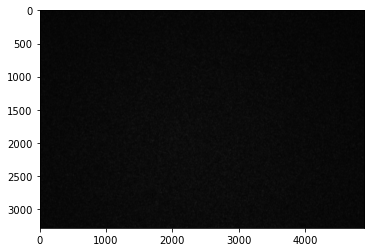

In [10]:
#importing libraries
import numpy as np
from scipy import ndimage
from scipy import misc
import imageio
import matplotlib.pyplot as plt
inputimage=imageio.imread('EncryptedImage.png')
plt.figure()
plt.imshow(inputimage,cmap=plt.cm.gray)

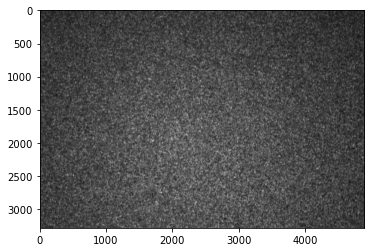

In [17]:
noise_reduced_image=ndimage.gaussian_filter(inputimage,2)
plt.imshow(np.abs(noise_reduced_image),plt.cm.gray)

The Gaussian beam profile from the laser beam is visible in the image.

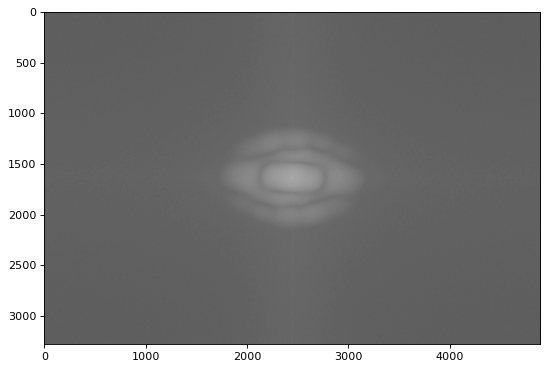

In [28]:
#Fourier transform of the image, to get an idea about the point spread function
fourier_image = np.fft.fftshift(np.fft.fft2(noise_reduced_image))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(fourier_image)), cmap='gray');

In [29]:
def Gerchbag_Saxton_algorithm(image,iteration_limit):
    n, m = fourier_image.shape
    phase_s = np.random.rand(n, m)
    phase_b = np.ones((n, m))
    amplitude_s = np.sqrt(image)
    amplitude_b = np.ones((n, m))

    signal_s = amplitude_s*np.exp(phase_s * 1j)
    
    for iter in range(iteration_limit):
        signal_b = np.fft.fft2(signal_s)
        phase_b = np.angle(signal_b)
        signal_b = amplitude_b*np.exp(phase_b * 1j)
        signal_s = np.fft.ifft2(signal_b)
        phase_s = np.angle(signal_s)
        signal_s = amplitude_s*np.exp(phase_s * 1j)

    phasemask =phase_b
    return phasemask
phase_mask = Gerchbag_Saxton_algorithm(fourier_image, 20)

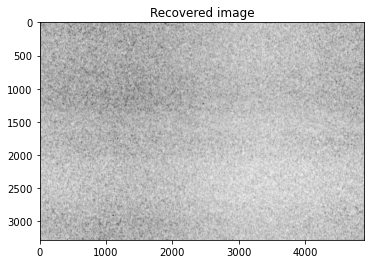

In [30]:
#using fourier transformed image as an initual guess
output_image = np.fft.fft2(np.exp(phase_mask*1j)*fourier_image)
plt.imshow(np.log(abs(output_image)),cmap='gray')
plt.title('Recovered image')
plt.show()